### Topic:     Project One - MTA and CitiBike EDA
### Subject: COVID-19's affect on MTA and CitiBike
### Date:       7/5/2020
### Group:   Sam Mize, Stephen Cho, Justin Chan

### Description:

COVID-19 has impacted our way of life,including public transportation.

This exploratory data analysis aims to show:

Effects of COVID-19 on MTA & CitiBike
How CitiBike can respond to COVID-19's effects

In [1]:
import pandas as pd
import numpy as np
import os 
import glob, os
from scipy import stats
from geopy.distance import great_circle
from geopy.distance import geodesic
import geopandas
import contextily as ctx
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import pickle
import seaborn as sns
%matplotlib inline 

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


## Create JANUARY - MAY 2019,2020 CitiBike Data Frame

First create the CitiBike DataFrame by searching through the file directory, and appending them to a list. <br>

Then use pd.concat() to combine them.



In [2]:

#Get 2019,2020 citibike into dataframes, loop through folder, and put data frames in a list 

df_bike_list_2020=[]
for filename in glob.iglob('data/citibike/2020/**.csv', recursive=True):
    if os.path.isfile(filename): # filter dirs
        df_bike_list_2020.append(pd.read_csv(filename))
        
        
df_bike_list_2019=[]
for filename in glob.iglob('data/citibike/2019/**.csv', recursive=True):
    if os.path.isfile(filename): # filter dirs
        df_bike_list_2019.append(pd.read_csv(filename))
        


In [3]:
#create 2019,2020 citibike by concating list of dfs
bike_2020_df = pd.concat(df_bike_list_2020)
bike_2019_df = pd.concat(df_bike_list_2019)

In [4]:
# release the df_bike_list_2019 and 2020 list from memory

del df_bike_list_2020
del df_bike_list_2019

Take a look at the columns within the dataframe by using the .head() method.

In [5]:
#2020 citibike
print(bike_2020_df.shape)
bike_2020_df.head()

(5626535, 15)


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,789,2020-01-01 00:00:55.3900,2020-01-01 00:14:05.1470,504,1 Ave & E 16 St,40.732219,-73.981656,307,Canal St & Rutgers St,40.714275,-73.989900,30326,Subscriber,1992,1
1,1541,2020-01-01 00:01:08.1020,2020-01-01 00:26:49.1780,3423,West Drive & Prospect Park West,40.661063,-73.979453,3300,Prospect Park West & 8 St,40.665147,-73.976376,17105,Customer,1969,1
2,1464,2020-01-01 00:01:42.1400,2020-01-01 00:26:07.0110,3687,E 33 St & 1 Ave,40.743227,-73.974498,259,South St & Whitehall St,40.701221,-74.012342,40177,Subscriber,1963,1
3,592,2020-01-01 00:01:45.5610,2020-01-01 00:11:38.1550,346,Bank St & Hudson St,40.736529,-74.006180,490,8 Ave & W 33 St,40.751551,-73.993934,27690,Subscriber,1980,1
4,702,2020-01-01 00:01:45.7880,2020-01-01 00:13:28.2400,372,Franklin Ave & Myrtle Ave,40.694546,-73.958014,3637,Fulton St & Waverly Ave,40.683239,-73.965996,32583,Subscriber,1982,1


In [6]:
#2019 citibike
print(bike_2019_df.shape)
bike_2019_df.head()

(6929648, 15)


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,320,2019-01-01 00:01:47.4010,2019-01-01 00:07:07.5810,3160.0,Central Park West & W 76 St,40.778968,-73.973747,3283.0,W 89 St & Columbus Ave,40.788221,-73.970416,15839,Subscriber,1971,1
1,316,2019-01-01 00:04:43.7360,2019-01-01 00:10:00.6080,519.0,Pershing Square North,40.751873,-73.977706,518.0,E 39 St & 2 Ave,40.747804,-73.973442,32723,Subscriber,1964,1
2,591,2019-01-01 00:06:03.9970,2019-01-01 00:15:55.4380,3171.0,Amsterdam Ave & W 82 St,40.785247,-73.976673,3154.0,E 77 St & 3 Ave,40.773142,-73.958562,27451,Subscriber,1987,1
3,2719,2019-01-01 00:07:03.5450,2019-01-01 00:52:22.6500,504.0,1 Ave & E 16 St,40.732219,-73.981656,3709.0,W 15 St & 6 Ave,40.738046,-73.996430,21579,Subscriber,1990,1
4,303,2019-01-01 00:07:35.9450,2019-01-01 00:12:39.5020,229.0,Great Jones St,40.727434,-73.993790,503.0,E 20 St & Park Ave,40.738274,-73.987520,35379,Subscriber,1979,1


Replace the spaces in the columns with a hyphen.

In [7]:
#Add Hyphens to bike df column names
bike_2019_df.columns= pd.Series(bike_2019_df.columns).str.replace(" ","_")
bike_2020_df.columns = pd.Series(bike_2020_df.columns).str.replace(" ","_")

Create time columns such as "DATE_TIME","DATE",and "weekday".

In [8]:
#create time columns for bike 
bike_2019_df["DATE_TIME"] = pd.to_datetime(bike_2019_df["starttime"])
bike_2020_df["DATE_TIME"] =  pd.to_datetime(bike_2020_df["starttime"])

bike_2020_df["DATE"] =  bike_2020_df["DATE_TIME"].dt.date
bike_2019_df["DATE"] =  bike_2019_df["DATE_TIME"].dt.date

bike_2020_df["weekday"] =  bike_2020_df["DATE_TIME"].dt.dayofweek
bike_2019_df["weekday"] =  bike_2019_df["DATE_TIME"].dt.dayofweek



# An Exploration of Citi Bike 2019/2020 Data

We can look at the daily rides for 2019 and 2020 by grouping each dataframe by 'DATE'. <br>
Create a column, 'MONTH_DAY' so that we can merge the dataframes with the common dates.

In [9]:
#Get the daily rides for 2019

bike_2019_daily = bike_2019_df.groupby(bike_2019_df.DATE_TIME.dt.date)['DATE'].count().reset_index().rename(
                                                                                    columns={"DATE":"DAILY_RIDES"})

#create a new column to merge on later
bike_2019_daily['MONTH_DAY']=pd.to_datetime(bike_2019_daily['DATE_TIME']).dt.strftime('%m-%d')
bike_2019_daily.rename(columns={"DAILY_RIDES":"DAILY_RIDES_19"},inplace=True)
print(bike_2019_daily.shape)


(151, 3)


In [10]:
#Get the daily rides for 2020
bike_2020_daily = bike_2020_df.groupby(bike_2020_df.DATE_TIME.dt.date)['DATE'].count().reset_index().rename(
                                                                                columns={"DATE":"DAILY_RIDES"})
bike_2020_daily.rename(columns={"DAILY_RIDES":"DAILY_RIDES_20"},inplace=True)

#create a new column to merge on later
bike_2020_daily['MONTH_DAY']=pd.to_datetime(bike_2020_daily['DATE_TIME']).dt.strftime('%m-%d')
print(bike_2020_daily.shape)
bike_2020_daily.head()

(152, 3)


,DATE_TIME,DAILY_RIDES_20,MONTH_DAY
0,2020-01-01,18114,01-01
1,2020-01-02,41556,01-02
2,2020-01-03,31873,01-03
3,2020-01-04,29436,01-04
4,2020-01-05,27589,01-05


# Daily CitiBike Rides 2019 & 2020

Merge the 2019/2020 daily dataframes together, and calculate the daily % change between 2019/2020. We use the pd.pct_change on the two columns.

In [11]:
#Create 2019 2020 Daily Data Frame and get the daily % change 2019/2020


bike_2019_2020_daily = bike_2019_daily.merge(bike_2020_daily,suffixes=('_19','_20'),on="MONTH_DAY")

#Calculate daily percent change
bike_2019_2020_daily_pct_diff = bike_2019_2020_daily[['DAILY_RIDES_19','DAILY_RIDES_20']].agg(
                                pd.DataFrame.pct_change,axis="columns")

bike_2019_2020_daily_pct_diff= bike_2019_2020_daily_pct_diff.rename(columns={"DAILY_RIDES_20":"PNCT_CHANGE_19_20"})

bike_2019_2020_daily_pct_diff = pd.concat([bike_2019_2020_daily_pct_diff,bike_2019_2020_daily['MONTH_DAY']],axis=1)

# Yearly Totals 2019/2020 Citi Bike Comparison

Calculate and plot the yearly totals, so we can see an overall difference between each year.

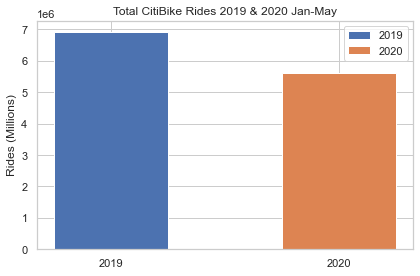

In [76]:
#Yearly Totals Comparison
#Sum the daily_rides together
bike_rides_2019 = np.sum(bike_2019_2020_daily.DAILY_RIDES_19)
bike_rides_2020 = np.sum(bike_2019_2020_daily.DAILY_RIDES_20)
bike_rides_dates = bike_2019_2020_daily['MONTH_DAY']


width = 0.5  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar("2019", bike_rides_2019 , width, label='2019')
rects2 = ax.bar("2020", bike_rides_2020, width, label='2020')

#add labels and titles
ax.set_ylabel('Rides (Millions)')
ax.set_title('Total CitiBike Rides 2019 & 2020 Jan-May')
fig.tight_layout()

ax.legend()

plt.savefig('citi_bikes_19_20_total.png', transparent=True,dpi=1000)

In [13]:

print(bike_2019_2020_daily.shape)
bike_2019_2020_daily.head()

(151, 5)


,DATE_TIME_19,DAILY_RIDES_19,MONTH_DAY,DATE_TIME_20,DAILY_RIDES_20
0,2019-01-01,21962,01-01,2020-01-01,18114
1,2019-01-02,37797,01-02,2020-01-02,41556
2,2019-01-03,41676,01-03,2020-01-03,31873
3,2019-01-04,43922,01-04,2020-01-04,29436
4,2019-01-05,17432,01-05,2020-01-05,27589


# Daily CitiBike Rides 2019 / 2020 Jan to May 

Plot the daily amounts  from 2019 / 2020 using matplotlib. This gives us an idea of how many people use Citibike. We'll get to percentages later. 

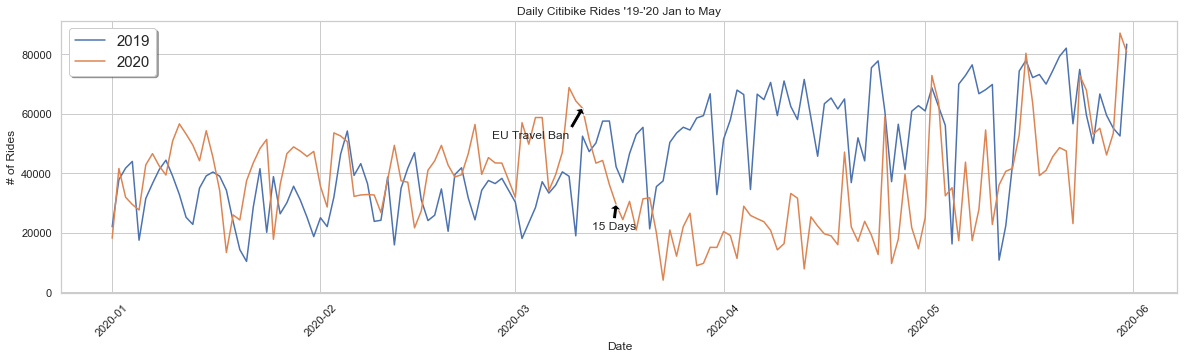

In [77]:
#Plot Daily Amounts 

plt.figure(figsize=[20,5])

#format x-axis ticks to months
months = mdates.DateFormatter('%M')

ax.xaxis.set_major_formatter(months)
plt.xticks(rotation=45)

x_axis_days =pd.to_datetime('20-'+bike_2019_2020_daily.MONTH_DAY,format="%y-%m-%d",yearfirst=False)

#Important Dates like EU travel ban date and 15 days to slow the spread announcement 
social_dist_date_index = x_axis_days[x_axis_days=="2020-03-16"].index
travel_ban_date_index = x_axis_days[x_axis_days=="2020-03-11"].index


#Annotate 15 days to slow the spread
plt.annotate(s="15 Days",
             xy=(x_axis_days[social_dist_date_index],bike_2019_2020_daily.DAILY_RIDES_20[social_dist_date_index]),
             xycoords='data',
             xytext=(-24,-25),
              textcoords="offset points",
             arrowprops=dict(facecolor='black', shrink=0.01, headlength=5, ))

#Annotate EU Travel Ban 
plt.annotate(s="EU Travel Ban",
    xy=(
    x_axis_days[travel_ban_date_index],bike_2019_2020_daily.DAILY_RIDES_20[travel_ban_date_index]),
    xytext=(-90,-30),
    xycoords='data',
    textcoords="offset points",
    arrowprops=dict(facecolor='black', shrink=0.01, headlength=5, ))

#plot 2019 daily rides
plt.plot(x_axis_days,bike_2019_2020_daily.DAILY_RIDES_19)

#plot 2020 daily_rides
plt.plot(x_axis_days,bike_2019_2020_daily.DAILY_RIDES_20)

# plot formatting
plt.legend(['2019','2020'],shadow = True, loc = "best",fontsize=15);
plt.title("Daily Citibike Rides '19-'20 Jan to May")
plt.xlabel('Date')
plt.ylabel("# of Rides")


plt.savefig('daily_citi_bikes_19_20_total.png', transparent=True,dpi=1000)

# Daily CitiBike % Change 2019 to 2020 

Do a quick multiplication 100 and the pct change to actually change it to "%".

After that, we can plot the daily % change.

In [15]:

#Multiply 100 to the column to make it into a percent 

bike_2019_2020_daily_pct_diff['PNCT_CHANGE_19_20']=bike_2019_2020_daily_pct_diff['PNCT_CHANGE_19_20']*100

In [16]:
#The NAN is there because pct_change uses the previous column to calculate % change
bike_2019_2020_daily_pct_diff.head()

,DAILY_RIDES_19,PNCT_CHANGE_19_20,MONTH_DAY
0,NaN,-17.521173,01-01
1,NaN,9.945234,01-02
2,NaN,-23.521931,01-03
3,NaN,-32.981194,01-04
4,NaN,58.266407,01-05


In [17]:
#create x axis
x_axis_days =pd.to_datetime('20-'+bike_2019_2020_daily_pct_diff.MONTH_DAY,format="%y-%m-%d",yearfirst=False)
x_axis_days.head

<bound method NDFrame.head of 0     2020-01-01
1     2020-01-02
2     2020-01-03
3     2020-01-04
4     2020-01-05
         ...    
146   2020-05-27
147   2020-05-28
148   2020-05-29
149   2020-05-30
150   2020-05-31
Name: MONTH_DAY, Length: 151, dtype: datetime64[ns]>

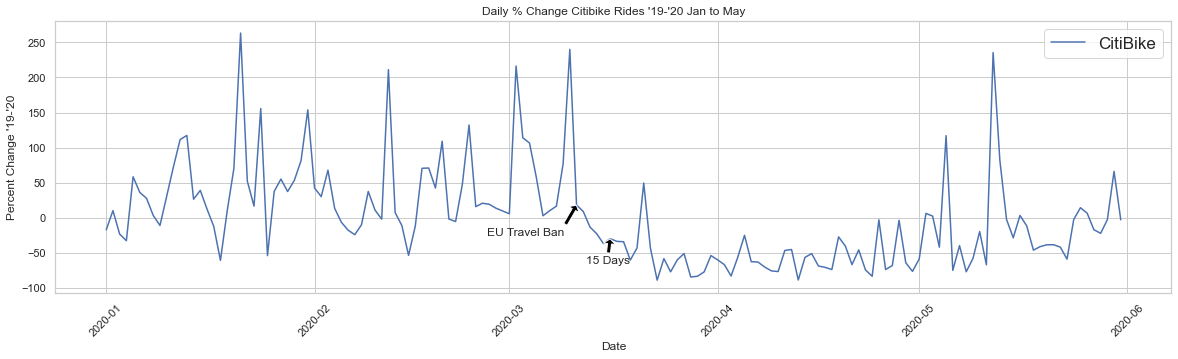

In [78]:
#Create Daily % Change 2019-2020

months = mdates.DateFormatter('%M')

#15 days to slow spread announcement date
social_dist_date_index = x_axis_days[x_axis_days=="2020-03-16"].index
travel_ban_date_index = x_axis_days[x_axis_days=="2020-03-11"].index

plt.figure(figsize=[20,5])

ax.xaxis.set_major_formatter(months)
plt.xticks(rotation=45)


#Annotate 15 days to slow the spread
plt.annotate(s="15 Days",xy=(x_axis_days[social_dist_date_index],bike_2019_2020_daily_pct_diff['PNCT_CHANGE_19_20'][social_dist_date_index]),
             xycoords='data',
             xytext=(-24,-25),
              textcoords="offset points",
             arrowprops=dict(facecolor='black', shrink=0.01, headlength=5, ))

#Annotate EU Travel Ban 
plt.annotate(s="EU Travel Ban",
    xy=(
    x_axis_days[travel_ban_date_index],bike_2019_2020_daily_pct_diff['PNCT_CHANGE_19_20'][travel_ban_date_index]),
    xytext=(-90,-30),
    xycoords='data',
    textcoords="offset points",
    arrowprops=dict(facecolor='black', shrink=0.01, headlength=5, ))


plt.title("Daily % Change Citibike Rides '19-'20 Jan to May")
plt.xlabel('Date')
plt.ylabel("Percent Change '19-'20")



plt.plot(x_axis_days,bike_2019_2020_daily_pct_diff['PNCT_CHANGE_19_20'],label="CitiBike")
plt.legend(fontsize=17)

plt.savefig('daily_citi_bikes_19_20_percent.png', transparent=True,dpi=1000)

# Top 10 Bike Stations in 2019 / 2020 Comparison

We can to compare the top ten bike stations in 2019 to 2020 to get feel of how CitiBike was affected. 

We group the bikes by their 'start_station_name'.

Then, we the ".size()" method to get the number of rows in each group.

In [19]:
# Compare 2019 2020 bike stations
# Use 2019 instead of 2020 to figure out top 10 bike stations 

#create data frame, sort by starting station name 
bike_2019_df_ride_counts = pd.DataFrame(bike_2019_df.groupby(['start_station_name'],as_index=False).size()).sort_values(ascending=False,by=0)

#add a column relating to its year
bike_2019_df_ride_counts["year"]="2019"
bike_2019_df_ride_counts = bike_2019_df_ride_counts.rename(columns={0:"ride_count"})

#get the top 10 
bike_2019_df_ride_counts = bike_2019_df_ride_counts.sort_values(by="ride_count",ascending=False)
bike_2019_df_ride_counts = bike_2019_df_ride_counts.head(10)

bike_2019_df_ride_counts

,ride_count,year
start_station_name,,
Pershing Square North,56192,2019
8 Ave & W 31 St,41977,2019
E 17 St & Broadway,41926,2019
Broadway & E 22 St,41181,2019
W 21 St & 6 Ave,40449,2019
Broadway & E 14 St,40024,2019
8 Ave & W 33 St,35042,2019
Broadway & W 60 St,34120,2019
W 20 St & 11 Ave,33568,2019


In [20]:
#Make a list of the top 10 2019 stations so we can see how it changed in 2020
top_ten_2019_stations = bike_2019_df_ride_counts.index.to_list()
top_ten_2019_stations

['Pershing Square North',
 '8 Ave & W 31 St',
 'E 17 St & Broadway',
 'Broadway & E 22 St',
 'W 21 St & 6 Ave',
 'Broadway & E 14 St',
 '8 Ave & W 33 St',
 'Broadway & W 60 St',
 'W 20 St & 11 Ave',
 'W 41 St & 8 Ave']

We do the same for 2020, but we specifically want the top performing ones from 2019. 

We use " top_ten_2019_stations " as a mask inorder to filter for the right ones.

In [21]:
#create data frame, sort by starting station name 
bike_2020_df_ride_counts = pd.DataFrame(bike_2020_df.groupby(['start_station_name'],as_index=False).size()).sort_values(ascending=False,by=0)

#add a column relating to its year
bike_2020_df_ride_counts["year"]="2020"

bike_2020_df_ride_counts = bike_2020_df_ride_counts.rename(columns={0:"ride_count"})

bike_2020_df_ride_counts = bike_2020_df_ride_counts.sort_values(by="ride_count",ascending=False)

#get the top 10 2019 stations in 2020
bike_2020_df_ride_counts = bike_2020_df_ride_counts.loc[top_ten_2019_stations]


In [22]:
#combine these 2019 and 2020 stations dataframes
bike_df_ride_counts_2019_2020 = pd.concat([bike_2019_df_ride_counts,bike_2020_df_ride_counts],axis=0)
bike_df_ride_counts_2019_2020 = bike_df_ride_counts_2019_2020.reset_index()
bike_df_ride_counts_2019_2020.head()


,start_station_name,ride_count,year
0,Pershing Square North,56192,2019
1,8 Ave & W 31 St,41977,2019
2,E 17 St & Broadway,41926,2019
3,Broadway & E 22 St,41181,2019
4,W 21 St & 6 Ave,40449,2019


# Top 10 stations in 2019 and how they were affected in 2020

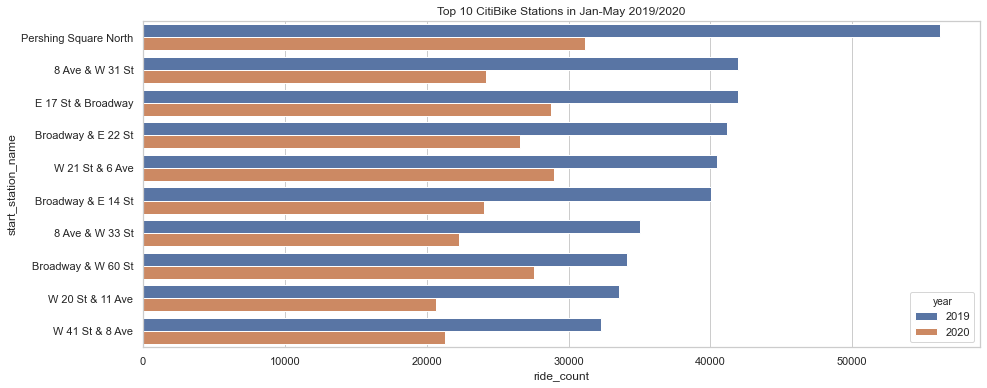

In [85]:
#Top 10 Stations in 2019 and how they were affected in 2020
sns.set(style="whitegrid", color_codes=True)
plt.figure(figsize=(15,6))
seabornAxHandle = sns.barplot( y="start_station_name",x="ride_count", data=bike_df_ride_counts_2019_2020, hue="year",)
plt.title(label="Top 10 CitiBike Stations in Jan-May 2019/2020")


plt.savefig('top_ten_bike_stations_19_20.png', transparent=True,dpi=1000)

# Average CitiBike rides per Weekday 2019/2020

Now we want to look at the average rides per weekday. 

How do rides fluctuate within the week? Did this change in 2020?

We sort our dataframe by "weekday" and use " .count() " to see how many rows are in each group.

We then divide these numbers by the number of weeks, which we get by accessing the 'DATE_TIME' column with " .dt.week.nunique()".

In [24]:
#average # of rides per weekday 2019

num_weeks_2019 = bike_2019_df.DATE_TIME.dt.week.nunique()


avg_week_day_bike_2019 = bike_2019_df.groupby("weekday")['start_station_name'].count().reset_index()
avg_week_day_bike_2019 = avg_week_day_bike_2019.rename(columns ={"start_station_name":"total_rides"})
avg_week_day_bike_2019['avg_rides_per_weekday']= avg_week_day_bike_2019['total_rides']/num_weeks_2019
avg_week_day_bike_2019['year']="year_2019"

 
avg_week_day_bike_2019.head()

,weekday,total_rides,avg_rides_per_weekday,year
0,0,948932,43133.272727,year_2019
1,1,1069504,48613.818182,year_2019
2,2,1143952,51997.818182,year_2019
3,3,1067501,48522.772727,year_2019
4,4,1078033,49001.500000,year_2019


In [25]:
#average # of rides per weekday 2020
num_weeks_2020 = bike_2020_df.DATE_TIME.dt.week.nunique()

avg_week_day_bike_2020 = bike_2020_df.groupby("weekday")['start_station_name'].count().reset_index()
avg_week_day_bike_2020 = avg_week_day_bike_2020.rename(columns ={"start_station_name":"total_rides"})
avg_week_day_bike_2020['avg_rides_per_weekday']= avg_week_day_bike_2020['total_rides']/num_weeks_2020
avg_week_day_bike_2020['year']="year_2020"
avg_week_day_bike_2020.head()

,weekday,total_rides,avg_rides_per_weekday,year
0,0,748973,34044.227273,year_2020
1,1,795693,36167.863636,year_2020
2,2,830240,37738.181818,year_2020
3,3,794885,36131.136364,year_2020
4,4,757391,34426.863636,year_2020


Below, we combine the 2019 2020 avg weekday dataframes.

On the plot we wish to have the weekdays as names instead of numbers, so we create a dictionary to map the names properly.

In [26]:

#combine the 2019 and 2020 avg week day dfs
avg_week_day_bike_2019_2020 = pd.concat([avg_week_day_bike_2020,avg_week_day_bike_2019],axis=0)

#change weekday numbers to names for the graph
weekday_dict={
    0:"Monday",
    1:"Tuesday",
    2:"Wednesday",
    3:"Thursday",
    4:"Friday",
    5:"Saturday",
    6:"Sunday"
    
}
avg_week_day_bike_2019_2020['weekday_name']=avg_week_day_bike_2019_2020.weekday.map(weekday_dict)
avg_week_day_bike_2019_2020.head()

,weekday,total_rides,avg_rides_per_weekday,year,weekday_name
0,0,748973,34044.227273,year_2020,Monday
1,1,795693,36167.863636,year_2020,Tuesday
2,2,830240,37738.181818,year_2020,Wednesday
3,3,794885,36131.136364,year_2020,Thursday
4,4,757391,34426.863636,year_2020,Friday


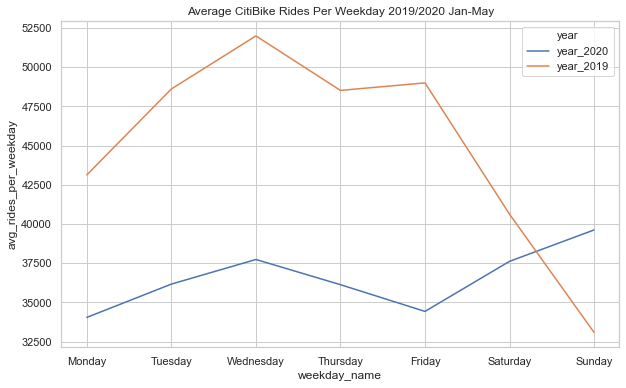

In [80]:

plt.figure(figsize=(10,6))
sns.set(style="whitegrid", color_codes=True)
plt.title(label="Average CitiBike Rides Per Weekday 2019/2020 Jan-May")
ax = sns.lineplot(x="weekday_name", y="avg_rides_per_weekday", hue="year",data=avg_week_day_bike_2019_2020,sort=False )

plt.savefig('avg_citibike_per_weekday_19_20.png',transparent=True,dpi=1000)


For some reason weekend rides increased in 2020 when compared to 2019.

# Create JANUARY - MAY 2019,2020 MTA Data Frame

Now lets take a look at some MTA data.

We read the files from the pickle containing clean data.

In [28]:
#read from pickle
with open('data/pickles/cleaned_mta_2019','rb') as read_file:
    mta_2019_df = pickle.load(read_file)
    
with open('data/pickles/cleaned_mta_2020','rb') as read_file:
    mta_2020_df = pickle.load(read_file)

In [29]:
#add some time columns
mta_2019_df.head()

,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits,datetime
19,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2019,07:00:00,REGULAR,9.0,12.0,2019-01-01 07:00:00
20,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2019,11:00:00,REGULAR,41.0,45.0,2019-01-01 11:00:00
21,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2019,15:00:00,REGULAR,120.0,21.0,2019-01-01 15:00:00
22,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2019,19:00:00,REGULAR,146.0,41.0,2019-01-01 19:00:00
23,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2019,23:00:00,REGULAR,131.0,20.0,2019-01-01 23:00:00


# 2019 / 2020  MTA  Turnstile Jan - May EDA

We create 2019 / 2020 daily entires by grouping by "date" and using the ".sum()" method.

In [30]:
#create dfs for daily entries 2019 and 2020 by grouping by date and summing
mta_entries_2019_dly = pd.DataFrame(mta_2019_df.groupby(['date']).entries.sum()).rename(columns={"entries":"entries_2019"})
mta_entries_2020_dly = pd.DataFrame(mta_2020_df.groupby(['date']).entries.sum()).rename(columns={"entries":"entries_2020"})

#reset index for each df and create a column to join columns on 
mta_entries_2019_dly = mta_entries_2019_dly.reset_index()
mta_entries_2019_dly['month_day']= mta_entries_2019_dly.date.map(lambda x:x[:2]+"-"+x[3:5])

mta_entries_2020_dly = mta_entries_2020_dly.reset_index()
mta_entries_2020_dly['month_day']=mta_entries_2020_dly.date.map(lambda x:x[:2]+"-"+x[3:5])
mta_entries_2020_dly.head()

,date,entries_2020,month_day
0,01/01/2020,2082249.0,01-01
1,01/02/2020,5184961.0,01-02
2,01/03/2020,5174092.0,01-03
3,01/04/2020,2969546.0,01-04
4,01/05/2020,2423663.0,01-05


We merge these two dataframes together.

In [31]:

#only month day from January to May
mta_2019_2020_same_days = mta_entries_2019_dly.merge(mta_entries_2020_dly,on="month_day")
mta_2019_2020_same_days = mta_2019_2020_same_days[pd.to_datetime(mta_2019_2020_same_days.date_y).dt.year==2020]
mta_2019_2020_same_days.head()


,date_x,entries_2019,month_day,date_y,entries_2020
0,01/01/2019,2024689.0,01-01,01/01/2020,2082249.0
1,01/02/2019,5286637.0,01-02,01/02/2020,5184961.0
2,01/03/2019,5579879.0,01-03,01/03/2020,5174092.0
3,01/04/2019,5528760.0,01-04,01/04/2020,2969546.0
4,01/05/2019,2802319.0,01-05,01/05/2020,2423663.0


# Daily MTA Turnstile '19-'20 Jan to May

Plot the changes of MTA Turnstile entries so we can see how COVID-19 affected it. 

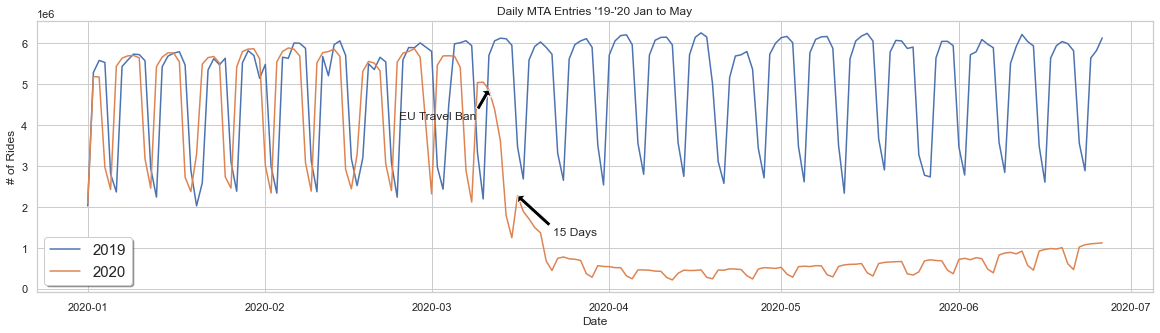

In [81]:
#Plot Daily Amounts 


plt.figure(figsize=[20,5])

#format x-axis ticks to months
months = mdates.DateFormatter('%M')


#Important Dates like EU travel ban date and 15 days to slow the spread announcement 
social_dist_date_index = mta_2019_2020_same_days[mta_2019_2020_same_days.date_y=="03/16/2020"].index
travel_ban_date_index = mta_2019_2020_same_days[mta_2019_2020_same_days.date_y=="03/11/2020"].index


#Annotate 15 days to slow the spread
plt.annotate(s="15 Days",
             xy=(mta_2019_2020_same_days.date_y[social_dist_date_index],mta_2019_2020_same_days.entries_2020[social_dist_date_index]),
             xycoords='data',
             xytext=(35,-40),
              textcoords="offset points",
             arrowprops=dict(facecolor='black', shrink=0.01, headlength=5, ))

#Annotate EU Travel Ban 
plt.annotate(s="EU Travel Ban",
    xy=(
    mta_2019_2020_same_days.date_y[travel_ban_date_index],mta_2019_2020_same_days.entries_2020[travel_ban_date_index]),
    xytext=(-90,-30),
    xycoords='data',
    textcoords="offset points",
    arrowprops=dict(facecolor='black', shrink=0.01, headlength=5, ))

plt.plot(pd.to_datetime(mta_2019_2020_same_days.date_y),mta_2019_2020_same_days.entries_2019)

plt.plot(pd.to_datetime(mta_2019_2020_same_days.date_y),mta_2019_2020_same_days.entries_2020)

plt.legend(['2019','2020'],shadow = True, loc = "best",fontsize=15);

plt.title("Daily MTA Entries '19-'20 Jan to May")
plt.xlabel('Date')
plt.ylabel("# of Rides")


plt.savefig('daily_mta_19_20.png',transparent=True,dpi=1000)

Next, we calculate the daily % percent change between 2019 to 2020.

In [33]:
#merge the mta daily 2019 2020 dataframes and calculate the pct change 
mta_entries_daily_change = mta_entries_2020_dly.merge(
                mta_entries_2019_dly,on="month_day")[['entries_2019','entries_2020']].pct_change(axis="columns")

#multiply pct change by 100  to change to %
mta_entries_daily_change['entries_2020'] = mta_entries_daily_change['entries_2020']*100

mta_entries_daily_change = mta_entries_daily_change.rename(columns={"entries_2020":"pct_chng_2019_2020"})
mta_entries_daily_change['month_day']=mta_entries_2020_dly['month_day']
mta_entries_daily_change

,entries_2019,pct_chng_2019_2020,month_day
0,NaN,2.842906,01-01
1,NaN,-1.923264,01-02
2,NaN,-7.272326,01-03
3,NaN,-46.289114,01-04
4,NaN,-13.512238,01-05
...,...,...,...
175,NaN,-80.968099,06-24
176,NaN,-81.748008,06-25
177,NaN,-14.490527,06-26
178,NaN,57.452418,12-28


In [34]:
#Filter the mta daily change dates ,for the same dates as citi bikes'

month_days_citi_bike = x_axis_days.astype(str).map(lambda x:x[5:])
matching_month_days_mask = mta_entries_daily_change.month_day.isin(month_days_citi_bike)

In [35]:
mta_entries_daily_change = mta_entries_daily_change[matching_month_days_mask]
mta_entries_daily_change.head()

,entries_2019,pct_chng_2019_2020,month_day
0,NaN,2.842906,01-01
1,NaN,-1.923264,01-02
2,NaN,-7.272326,01-03
3,NaN,-46.289114,01-04
4,NaN,-13.512238,01-05


# Daily % Change 2019-2020 - MTA & CitiBike Jan-May

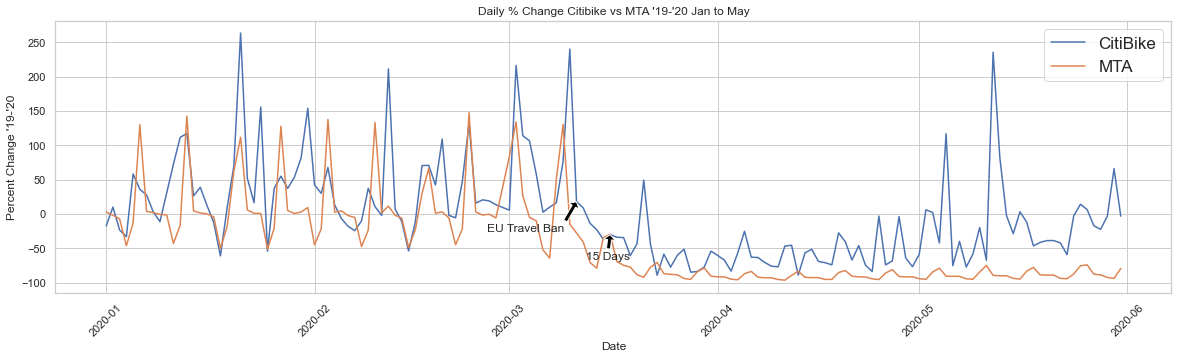

In [82]:
#Plot Daily % Change 2019-2020 - MTA % CitiBike


months = mdates.DateFormatter('%M')

#15 days to slow spread announcement date
social_dist_date_index = x_axis_days[x_axis_days=="2020-03-16"].index
travel_ban_date_index = x_axis_days[x_axis_days=="2020-03-11"].index

plt.figure(figsize=[20,5])

ax.xaxis.set_major_formatter(months)
plt.xticks(rotation=45)


#Annotate 15 days to slow the spread
plt.annotate(s="15 Days",xy=(x_axis_days[social_dist_date_index],bike_2019_2020_daily_pct_diff['PNCT_CHANGE_19_20'][social_dist_date_index]),
             xycoords='data',
             xytext=(-24,-25),
              textcoords="offset points",
             arrowprops=dict(facecolor='black', shrink=0.01, headlength=5, ))

#Annotate EU Travel Ban 
plt.annotate(s="EU Travel Ban",
    xy=(
    x_axis_days[travel_ban_date_index],bike_2019_2020_daily_pct_diff['PNCT_CHANGE_19_20'][travel_ban_date_index]),
    xytext=(-90,-30),
    xycoords='data',
    textcoords="offset points",
    arrowprops=dict(facecolor='black', shrink=0.01, headlength=5, ))


plt.title("Daily % Change Citibike vs MTA '19-'20 Jan to May")
plt.xlabel('Date')
plt.ylabel("Percent Change '19-'20")



plt.plot(x_axis_days,bike_2019_2020_daily_pct_diff['PNCT_CHANGE_19_20'],label="CitiBike")
plt.plot(x_axis_days,mta_entries_daily_change['pct_chng_2019_2020'],label="MTA")
plt.legend(loc='upper right',fontsize=17)

plt.savefig('daily_pct_chge_mta_bike_19_20.png', transparent=True,dpi=1000)


# Average MTA Entries Per Weekday 2019/2020 Jan-May

As we did with CitiBike, we want to show how MTA entries fluctuated throughout the week. 

In [37]:
mta_2020_df.head()

,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits,datetime
25,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2020,07:00:00,REGULAR,7.0,11.0,2020-01-01 07:00:00
26,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2020,11:00:00,REGULAR,31.0,39.0,2020-01-01 11:00:00
27,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2020,15:00:00,REGULAR,118.0,40.0,2020-01-01 15:00:00
28,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2020,19:00:00,REGULAR,182.0,57.0,2020-01-01 19:00:00
29,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2020,23:00:00,REGULAR,124.0,32.0,2020-01-01 23:00:00


In [38]:
#Filter years for only 2020 and 2019

mta_2020_entries_day_of_week = mta_2020_df[pd.to_datetime(mta_2020_df.date).dt.year==2020][['date','entries']]
mta_2019_entries_day_of_week = mta_2019_df[pd.to_datetime(mta_2019_df.date).dt.year==2019][['date','entries']]


In [39]:
#Group each year by weekday and sum the entries within each weekday

mta_2020_entries_day_of_week_sum = mta_2020_entries_day_of_week.groupby(
                    pd.to_datetime(mta_2020_entries_day_of_week.date).dt.dayofweek).sum()
                         
mta_2019_entries_day_of_week_sum = mta_2019_entries_day_of_week.groupby(
                    pd.to_datetime(mta_2019_entries_day_of_week.date).dt.dayofweek).sum()

#num weeks in each year
num_weeks_2020 = pd.to_datetime(mta_2020_entries_day_of_week.date).dt.week.nunique()
num_weeks_2019 = pd.to_datetime(mta_2019_entries_day_of_week.date).dt.week.nunique()


mta_2020_avg_weekday_entry = (mta_2020_entries_day_of_week_sum/num_weeks_2020).astype(int)
mta_2019_avg_weekday_entry = (mta_2019_entries_day_of_week_sum/num_weeks_2019).astype(int)

#add year column 
mta_2020_avg_weekday_entry['year']="year_2020"
mta_2019_avg_weekday_entry['year']="year_2019"

#reset index and concat together 

mta_2020_avg_weekday_entry = mta_2020_avg_weekday_entry.reset_index()
mta_2019_avg_weekday_entry = mta_2019_avg_weekday_entry.reset_index()



In [40]:
mta_2019_2020_avg_weekday_entry = pd.concat([mta_2019_avg_weekday_entry,mta_2020_avg_weekday_entry])

mta_2019_2020_avg_weekday_entry['week_day'] = mta_2019_2020_avg_weekday_entry.date.map(weekday_dict)

mta_2019_2020_avg_weekday_entry.head()

,date,entries,year,week_day
0,0,5036076,year_2019,Monday
1,1,5689158,year_2019,Tuesday
2,2,5957155,year_2019,Wednesday
3,3,5937356,year_2019,Thursday
4,4,5754981,year_2019,Friday


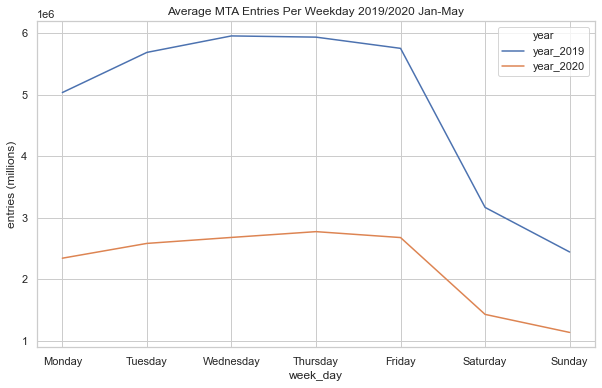

In [83]:
plt.figure(figsize=(10,6))

sns.set(style="whitegrid", color_codes=True)
plt.title(label="Average MTA Entries Per Weekday 2019/2020 Jan-May")

ax = sns.lineplot(x="week_day", y="entries", hue="year",data=mta_2019_2020_avg_weekday_entry,sort=False )

ax.set(ylabel="entries (millions)")

plt.savefig('avg_mta_entries_weekday_19_20.png', transparent=True,dpi=1000)

# Average MTA Entries Weekly % Change 2019 & 2020 Jan to May 

As we did with the daily MTA % change, lets do to weekly % change.

In [42]:
mta_2020_df.head()

,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits,datetime
25,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2020,07:00:00,REGULAR,7.0,11.0,2020-01-01 07:00:00
26,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2020,11:00:00,REGULAR,31.0,39.0,2020-01-01 11:00:00
27,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2020,15:00:00,REGULAR,118.0,40.0,2020-01-01 15:00:00
28,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2020,19:00:00,REGULAR,182.0,57.0,2020-01-01 19:00:00
29,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2020,23:00:00,REGULAR,124.0,32.0,2020-01-01 23:00:00


In [43]:
#group by date and station 2019 & 2020
mta_2020_df_wk_station = mta_2020_df.groupby(
                        ['station',pd.to_datetime(mta_2020_df.date).dt.week])['entries'].sum().reset_index()

mta_2019_df_wk_station = mta_2019_df.groupby(
                        ['station',pd.to_datetime(mta_2019_df.date).dt.week])['entries'].sum().reset_index()




In [44]:

# rename a column from 'date' to week 

mta_2019_df_wk_station = mta_2019_df_wk_station.rename(columns={"date":'week'})
mta_2020_df_wk_station = mta_2020_df_wk_station.rename(columns={"date": 'week'})


In [45]:

#combine weekly 2019 2020 weekly entries by station
mta_19_20_df_wkly_station = mta_2020_df_wk_station.merge(
                        mta_2019_df_wk_station,
                        on=["station"],
                        suffixes=["_2020","_2019"])


#make the indexes as stations
mta_19_20_df_wkly_station.index= [mta_19_20_df_wkly_station.iloc[:,0]]
mta_19_20_df_wkly_station.head()


,station,week_2020,entries_2020,week_2019,entries_2019
station,,,,,
1 AV,1 AV,1,72784.0,1,104433.0
1 AV,1 AV,1,72784.0,2,131153.0
1 AV,1 AV,1,72784.0,3,129690.0
1 AV,1 AV,1,72784.0,4,121071.0
1 AV,1 AV,1,72784.0,5,100058.0


In [46]:
#calculate weekly % change per station, rename column to 'avg_wkly_entries'

mta_19_20_df_wkly_station_pct_change = mta_19_20_df_wkly_station[['entries_2019','entries_2020']].pct_change(
                        axis="columns").rename(columns={"entries_2020":"avg_wkly_pct_change"})
mta_19_20_df_wkly_station_pct_change.head()

,entries_2019,avg_wkly_pct_change
station,,
1 AV,NaN,-0.303056
1 AV,NaN,-0.445045
1 AV,NaN,-0.438785
1 AV,NaN,-0.398832
1 AV,NaN,-0.272582


In [47]:
#group the weekly percent change by station
#take the mean to get the average week % change

mta_19_20_df_wkly_station_pct_change = mta_19_20_df_wkly_station_pct_change.groupby("station").mean()

#sort_values
mta_19_20_df_wkly_station_pct_change = mta_19_20_df_wkly_station_pct_change.sort_values(by="avg_wkly_pct_change")

#reset index
mta_19_20_df_wkly_station_pct_change = mta_19_20_df_wkly_station_pct_change.reset_index()

#multiply avg_wkly_pct_change by 100 to turn to percentage

mta_19_20_df_wkly_station_pct_change['avg_wkly_pct_change'] = 100 * mta_19_20_df_wkly_station_pct_change.avg_wkly_pct_change
mta_19_20_df_wkly_station_pct_change.head()

,station,entries_2019,avg_wkly_pct_change
0,191 ST,NaN,-73.662265
1,AQUEDUCT RACETR,NaN,-62.899902
2,METS-WILLETS PT,NaN,-61.934615
3,PRINCE ST,NaN,-61.829906
4,6 AV,NaN,-61.291267


In [48]:
#Sum the entries for each station

mta_2019_df_wk_station_sorted = mta_2019_df_wk_station.groupby(["station"]).sum().reset_index().sort_values(
                                by="entries",ascending=False)

mta_2019_df_wk_station_sorted = mta_2019_df_wk_station_sorted.reset_index()

#find top 50 weekly stations by entry of 2019 
mta_2019_df_wk_station_sorted = mta_2019_df_wk_station_sorted.iloc[:50]
mta_2019_df_wk_station_sorted = mta_2019_df_wk_station_sorted.drop(columns="week")
mta_2019_df_wk_station_sorted.head(10)

,index,station,entries
0,61,34 ST-PENN STA,26178202.0
1,233,GRD CNTRL-42 ST,22910810.0
2,59,34 ST-HERALD SQ,19498602.0
3,46,23 ST,17795974.0
4,68,42 ST-PORT AUTH,16584153.0
5,14,14 ST-UNION SQ,16097984.0
6,353,TIMES SQ-42 ST,15956073.0
7,226,FULTON ST,14458469.0
8,110,86 ST,13377517.0
9,9,125 ST,12517071.0


### We want to find the top 50 MTA stations in 2019 , so that we can see had the largest % decrease.

In [49]:
#Use the top 50 mta stations in 2019 as a mask

top_50_2019_mta_mask =mta_19_20_df_wkly_station_pct_change.station.isin(mta_2019_df_wk_station_sorted.station)

#Filter the weekly avg percent change to only reflect the mask
mta_19_20_df_wkly_station_pct_change = mta_19_20_df_wkly_station_pct_change[top_50_2019_mta_mask]

#reassign to another name - its too long of a variable
mta_wk_pct_19_20 = mta_19_20_df_wkly_station_pct_change.head(10)
mta_wk_pct_19_20

,station,entries_2019,avg_wkly_pct_change
10,TIMES SQ-42 ST,NaN,-56.013896
13,CANAL ST,NaN,-55.429102
20,8 AV,NaN,-54.388675
23,SPRING ST,NaN,-54.156090
27,50 ST,NaN,-53.605282
30,47-50 STS ROCK,NaN,-52.727814
31,34 ST-HERALD SQ,NaN,-52.726501
33,34 ST-PENN STA,NaN,-52.502787
37,GRD CNTRL-42 ST,NaN,-52.203239
42,59 ST COLUMBUS,NaN,-51.179625


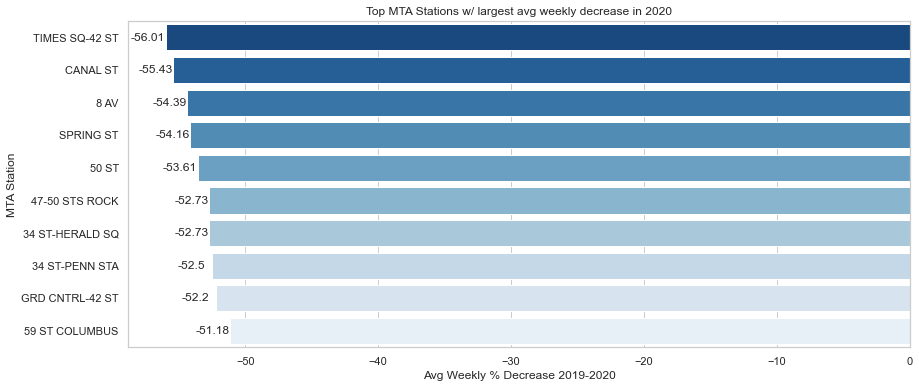

In [84]:
plt.figure(figsize=(14,6))


sns.barplot(y=mta_wk_pct_19_20.station,x=mta_wk_pct_19_20.avg_wkly_pct_change,palette="Blues_r")
plt.title(label="Top MTA Stations w/ largest avg weekly decrease in 2020")
plt.xlabel("Avg Weekly % Decrease 2019-2020")
plt.ylabel("MTA Station")


for x,y in zip(mta_wk_pct_19_20.avg_wkly_pct_change,range(0,10)):
    plt.annotate(round(x,2),
                 xy=(x,y),
                 xycoords='data',
                 xytext=(-34.5,-3),
                  textcoords="offset points",
                )


plt.savefig('top_mta_station_largest_avg_weekly_dec.png', transparent=True,dpi=1000)

In [51]:
#create top 10 mta stations with/ largest avg weekly decrease in 2020 

top_ten_mta_largest_avg_wk_decrease =  mta_wk_pct_19_20.station

# CitiBike / MTA map

We want to visualize the closest CitiBike stations to these affected MTA's.

### Get MTA Station Coordinates

In [52]:
# Get the unique list of Stations 

station_info_df = pd.read_csv("data/stations.txt")
station_info_df_small = station_info_df[['Stop Name','GTFS Latitude','GTFS Longitude']]
station_info_df_small = station_info_df_small.drop_duplicates(subset="Stop Name")
station_info_df.head()

,Station ID,Complex ID,GTFS Stop ID,Division,Line,Stop Name,Borough,Daytime Routes,Structure,GTFS Latitude,GTFS Longitude,North Direction Label,South Direction Label
0,1,1,R01,BMT,Astoria,Astoria - Ditmars Blvd,Q,N W,Elevated,40.775036,-73.912034,NaN,Manhattan
1,2,2,R03,BMT,Astoria,Astoria Blvd,Q,N W,Elevated,40.770258,-73.917843,Ditmars Blvd,Manhattan
2,3,3,R04,BMT,Astoria,30 Av,Q,N W,Elevated,40.766779,-73.921479,Astoria - Ditmars Blvd,Manhattan
3,4,4,R05,BMT,Astoria,Broadway,Q,N W,Elevated,40.761820,-73.925508,Astoria - Ditmars Blvd,Manhattan
4,5,5,R06,BMT,Astoria,36 Av,Q,N W,Elevated,40.756804,-73.929575,Astoria - Ditmars Blvd,Manhattan


In [53]:
station_info_df.head()

,Station ID,Complex ID,GTFS Stop ID,Division,Line,Stop Name,Borough,Daytime Routes,Structure,GTFS Latitude,GTFS Longitude,North Direction Label,South Direction Label
0,1,1,R01,BMT,Astoria,Astoria - Ditmars Blvd,Q,N W,Elevated,40.775036,-73.912034,NaN,Manhattan
1,2,2,R03,BMT,Astoria,Astoria Blvd,Q,N W,Elevated,40.770258,-73.917843,Ditmars Blvd,Manhattan
2,3,3,R04,BMT,Astoria,30 Av,Q,N W,Elevated,40.766779,-73.921479,Astoria - Ditmars Blvd,Manhattan
3,4,4,R05,BMT,Astoria,Broadway,Q,N W,Elevated,40.761820,-73.925508,Astoria - Ditmars Blvd,Manhattan
4,5,5,R06,BMT,Astoria,36 Av,Q,N W,Elevated,40.756804,-73.929575,Astoria - Ditmars Blvd,Manhattan


In [54]:

print(f'{station_info_df_small.shape} Shape of Station info data frame')
station_info_df_small.head()

(377, 3) Shape of Station info data frame


,Stop Name,GTFS Latitude,GTFS Longitude
0,Astoria - Ditmars Blvd,40.775036,-73.912034
1,Astoria Blvd,40.770258,-73.917843
2,30 Av,40.766779,-73.921479
3,Broadway,40.761820,-73.925508
4,36 Av,40.756804,-73.929575


### We create a dictionary of the stations and their latitudes and longitudes.

In [55]:
#create dictionary of stations and their latitudes and longitude

station_info_dict={d['Stop Name']: (d['GTFS Latitude'],d['GTFS Longitude']) for d in station_info_df_small.to_dict(orient='records')}

#Look in the dictionary
print(f'Some Keys of this dictionary {list(station_info_dict.keys())[:5]}\n')

print(f'Some Values of this dictionary {list(station_info_dict.values())[:5]}')



Some Keys of this dictionary ['Astoria - Ditmars Blvd', 'Astoria Blvd', '30 Av', 'Broadway', '36 Av']

Some Values of this dictionary [(40.775036, -73.91203399999999), (40.770258, -73.917843), (40.766779, -73.921479), (40.76182, -73.925508), (40.756803999999995, -73.929575)]


In [56]:
station_info_df.head()

,Station ID,Complex ID,GTFS Stop ID,Division,Line,Stop Name,Borough,Daytime Routes,Structure,GTFS Latitude,GTFS Longitude,North Direction Label,South Direction Label
0,1,1,R01,BMT,Astoria,Astoria - Ditmars Blvd,Q,N W,Elevated,40.775036,-73.912034,NaN,Manhattan
1,2,2,R03,BMT,Astoria,Astoria Blvd,Q,N W,Elevated,40.770258,-73.917843,Ditmars Blvd,Manhattan
2,3,3,R04,BMT,Astoria,30 Av,Q,N W,Elevated,40.766779,-73.921479,Astoria - Ditmars Blvd,Manhattan
3,4,4,R05,BMT,Astoria,Broadway,Q,N W,Elevated,40.761820,-73.925508,Astoria - Ditmars Blvd,Manhattan
4,5,5,R06,BMT,Astoria,36 Av,Q,N W,Elevated,40.756804,-73.929575,Astoria - Ditmars Blvd,Manhattan


### The function below is used to get the closest MTA station to each Bike Station. 

It creates a dictionary of the distances between the bike stations and MTA stations, and returns the key with the minimum distance.

This function is actually from an introductory METIS class prior to the bootcamp. Thank you!

In [57]:

#create function to find_closest mta station
def find_closest_mta_station(latitude,longitude):
    station_distances =  {mta_station:great_circle(station_info_dict[mta_station],(latitude,longitude)).miles for mta_station in station_info_dict} 
    min_station = min(station_distances,key=station_distances.get)
    return min_station
    



In [58]:
#create unique starting and ending bike stations df so we can find the closest MTA stations more quickly

unique_bike_stations_df_2019_start = bike_2019_df.drop_duplicates(subset=["start_station_name"])
unique_bike_stations_df_2019_end = bike_2019_df.drop_duplicates(subset=["end_station_name"])

unique_bike_stations_df_2020_start = bike_2020_df.drop_duplicates(subset=["start_station_name"])
unique_bike_stations_df_2020_end = bike_2020_df.drop_duplicates(subset=["end_station_name"])


unique_bike_stations_df_2019_start = unique_bike_stations_df_2019_start[['start_station_name','start_station_latitude','start_station_longitude']]
unique_bike_stations_df_2019_end = unique_bike_stations_df_2019_end[['end_station_name','end_station_latitude','end_station_longitude']]

unique_bike_stations_df_2020_start = unique_bike_stations_df_2020_start[['start_station_name','start_station_latitude','start_station_longitude']]
unique_bike_stations_df_2020_end = unique_bike_stations_df_2020_end[['end_station_name','end_station_latitude','end_station_longitude']]

In [59]:
#unique bike stations in one df 
unique_bike_stations_start = pd.concat([unique_bike_stations_df_2019_start,unique_bike_stations_df_2020_start]).drop_duplicates(subset="start_station_name")

unique_bike_stations_end = pd.concat([unique_bike_stations_df_2019_end,unique_bike_stations_df_2020_end]).drop_duplicates(subset="end_station_name")

unique_bike_stations_start.head()
unique_bike_stations_end.head()

,end_station_name,end_station_latitude,end_station_longitude
0,W 89 St & Columbus Ave,40.788221,-73.970416
1,E 39 St & 2 Ave,40.747804,-73.973442
2,E 77 St & 3 Ave,40.773142,-73.958562
3,W 15 St & 6 Ave,40.738046,-73.996430
4,E 20 St & Park Ave,40.738274,-73.987520


# Determine Bike Stations closest to MTA Stations
We apply our function from above 'find_closest_mta_station' to each row. It returns a series of the closest MTA stations the bike stations.

In [60]:
unique_bike_stations_start['closest_mta_start']=unique_bike_stations_start.apply(lambda x:find_closest_mta_station(x['start_station_latitude'],x['start_station_longitude']),axis=1)

unique_bike_stations_end['closest_mta_end']=unique_bike_stations_end.apply(lambda x:find_closest_mta_station(x['end_station_latitude'],x['end_station_longitude']),axis=1)



In [61]:
#Now we have the unique bike stations
print(unique_bike_stations_start.shape)
print(unique_bike_stations_start.closest_mta_start.nunique())

unique_bike_stations_start.head()

(999, 4)
158


,start_station_name,start_station_latitude,start_station_longitude,closest_mta_start
0,Central Park West & W 76 St,40.778968,-73.973747,81 St - Museum of Natural History
1,Pershing Square North,40.751873,-73.977706,Grand Central - 42 St
2,Amsterdam Ave & W 82 St,40.785247,-73.976673,81 St - Museum of Natural History
3,1 Ave & E 16 St,40.732219,-73.981656,1 Av
4,Great Jones St,40.727434,-73.993790,Bleecker St


In [62]:
#Add closest mta_station to 2019 bike df

bike_2019_df_mta = bike_2019_df.merge(unique_bike_stations_start,on=["start_station_name","start_station_latitude",'start_station_longitude'],how="left")
bike_2019_df_mta = bike_2019_df_mta.merge(unique_bike_stations_end,on=["end_station_name","end_station_latitude",'end_station_longitude'],how="left")
print(bike_2019_df_mta.shape)
bike_2019_df_mta.head()

(6929648, 20)


,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,DATE_TIME,DATE,weekday,closest_mta_start,closest_mta_end
0,320,2019-01-01 00:01:47.4010,2019-01-01 00:07:07.5810,3160.0,Central Park West & W 76 St,40.778968,-73.973747,3283.0,W 89 St & Columbus Ave,40.788221,-73.970416,15839,Subscriber,1971,1,2019-01-01 00:01:47.401,2019-01-01,1,81 St - Museum of Natural History,96 St
1,316,2019-01-01 00:04:43.7360,2019-01-01 00:10:00.6080,519.0,Pershing Square North,40.751873,-73.977706,518.0,E 39 St & 2 Ave,40.747804,-73.973442,32723,Subscriber,1964,1,2019-01-01 00:04:43.736,2019-01-01,1,Grand Central - 42 St,Grand Central - 42 St
2,591,2019-01-01 00:06:03.9970,2019-01-01 00:15:55.4380,3171.0,Amsterdam Ave & W 82 St,40.785247,-73.976673,3154.0,E 77 St & 3 Ave,40.773142,-73.958562,27451,Subscriber,1987,1,2019-01-01 00:06:03.997,2019-01-01,1,81 St - Museum of Natural History,68 St - Hunter College
3,2719,2019-01-01 00:07:03.5450,2019-01-01 00:52:22.6500,504.0,1 Ave & E 16 St,40.732219,-73.981656,3709.0,W 15 St & 6 Ave,40.738046,-73.996430,21579,Subscriber,1990,1,2019-01-01 00:07:03.545,2019-01-01,1,1 Av,6 Av
4,303,2019-01-01 00:07:35.9450,2019-01-01 00:12:39.5020,229.0,Great Jones St,40.727434,-73.993790,503.0,E 20 St & Park Ave,40.738274,-73.987520,35379,Subscriber,1979,1,2019-01-01 00:07:35.945,2019-01-01,1,Bleecker St,23 St


In [63]:
#Add closest mta_station to 2020 bike df
bike_2020_df_mta = bike_2020_df.merge(unique_bike_stations_start,on=["start_station_name","start_station_latitude",'start_station_longitude'],how="left")
bike_2020_df_mta = bike_2020_df_mta.merge(unique_bike_stations_end,on=["end_station_name","end_station_latitude",'end_station_longitude'],how="left")
print(bike_2020_df_mta.shape)
bike_2020_df_mta.head()

(5626535, 20)


,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,DATE_TIME,DATE,weekday,closest_mta_start,closest_mta_end
0,789,2020-01-01 00:00:55.3900,2020-01-01 00:14:05.1470,504,1 Ave & E 16 St,40.732219,-73.981656,307,Canal St & Rutgers St,40.714275,-73.989900,30326,Subscriber,1992,1,2020-01-01 00:00:55.390,2020-01-01,2,1 Av,East Broadway
1,1541,2020-01-01 00:01:08.1020,2020-01-01 00:26:49.1780,3423,West Drive & Prospect Park West,40.661063,-73.979453,3300,Prospect Park West & 8 St,40.665147,-73.976376,17105,Customer,1969,1,2020-01-01 00:01:08.102,2020-01-01,2,15 St - Prospect Park,15 St - Prospect Park
2,1464,2020-01-01 00:01:42.1400,2020-01-01 00:26:07.0110,3687,E 33 St & 1 Ave,40.743227,-73.974498,259,South St & Whitehall St,40.701221,-74.012342,40177,Subscriber,1963,1,2020-01-01 00:01:42.140,2020-01-01,2,33 St,South Ferry
3,592,2020-01-01 00:01:45.5610,2020-01-01 00:11:38.1550,346,Bank St & Hudson St,40.736529,-74.006180,490,8 Ave & W 33 St,40.751551,-73.993934,27690,Subscriber,1980,1,2020-01-01 00:01:45.561,2020-01-01,2,Christopher St - Sheridan Sq,34 St - Penn Station
4,702,2020-01-01 00:01:45.7880,2020-01-01 00:13:28.2400,372,Franklin Ave & Myrtle Ave,40.694546,-73.958014,3637,Fulton St & Waverly Ave,40.683239,-73.965996,32583,Subscriber,1982,1,2020-01-01 00:01:45.788,2020-01-01,2,Classon Av,Clinton - Washington Avs


In [88]:
top_ten_mta_largest_avg_wk_decrease.head()

10    TIMES SQ-42 ST
13          CANAL ST
20              8 AV
23         SPRING ST
27             50 ST
Name: station, dtype: object

In [65]:
#create a dictionary that maps the mta stations name to each other 

#These are the Top 10 MTA with the largest avg decrease

#8 AV, #50 ST were not in the "closest_starting_mta"
mta_station_map_dict = {
                        "Times Sq - 42 St":"TIMES SQ-42 ST",
                        "Canal St":"CANAL ST",
                                  
                        "Spring St":"SPRING ST",
                        "47-50 Sts - Rockefeller Ctr":"47-50 STS ROCK",
                        "34 St - Herald Sq": "34 ST-HERALD SQ",
                        "34 St - Penn Station" : "34 ST-PENN STA",
                        "Grand Central - 42 St":"GRD CNTRL-42 ST",
                        "59 St - Columbus Circle":" 59 ST COLUMBUS",    
                       }

#put the starting station longitude and latitude column name in a list so we can use later

lat_long = ['start_station_latitude','start_station_longitude']

In [66]:
bike_2020_df_mta.head()

,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,DATE_TIME,DATE,weekday,closest_mta_start,closest_mta_end
0,789,2020-01-01 00:00:55.3900,2020-01-01 00:14:05.1470,504,1 Ave & E 16 St,40.732219,-73.981656,307,Canal St & Rutgers St,40.714275,-73.989900,30326,Subscriber,1992,1,2020-01-01 00:00:55.390,2020-01-01,2,1 Av,East Broadway
1,1541,2020-01-01 00:01:08.1020,2020-01-01 00:26:49.1780,3423,West Drive & Prospect Park West,40.661063,-73.979453,3300,Prospect Park West & 8 St,40.665147,-73.976376,17105,Customer,1969,1,2020-01-01 00:01:08.102,2020-01-01,2,15 St - Prospect Park,15 St - Prospect Park
2,1464,2020-01-01 00:01:42.1400,2020-01-01 00:26:07.0110,3687,E 33 St & 1 Ave,40.743227,-73.974498,259,South St & Whitehall St,40.701221,-74.012342,40177,Subscriber,1963,1,2020-01-01 00:01:42.140,2020-01-01,2,33 St,South Ferry
3,592,2020-01-01 00:01:45.5610,2020-01-01 00:11:38.1550,346,Bank St & Hudson St,40.736529,-74.006180,490,8 Ave & W 33 St,40.751551,-73.993934,27690,Subscriber,1980,1,2020-01-01 00:01:45.561,2020-01-01,2,Christopher St - Sheridan Sq,34 St - Penn Station
4,702,2020-01-01 00:01:45.7880,2020-01-01 00:13:28.2400,372,Franklin Ave & Myrtle Ave,40.694546,-73.958014,3637,Fulton St & Waverly Ave,40.683239,-73.965996,32583,Subscriber,1982,1,2020-01-01 00:01:45.788,2020-01-01,2,Classon Av,Clinton - Washington Avs


### Here we map the bike stations MTA names to 'standard' names.
If the closest MTA station is not in the dictionary, it will return NAN.
We filter out the NAN, so now we have bike stations with only the top ten MTA stations w/ largest percent decrease. 

In [67]:

# Map "closest_mta_start" to the top ten mta station names. 

bike_2020_mta_top_ten = bike_2020_df_mta[pd.notna(bike_2020_df_mta.closest_mta_start.map(mta_station_map_dict))]
bike_2019_mta_top_ten = bike_2019_df_mta[pd.notna(bike_2019_df_mta.closest_mta_start.map(mta_station_map_dict))]

bike_2020_mta_top_ten['closest_mta_start_match'] = bike_2020_mta_top_ten.closest_mta_start.map(mta_station_map_dict)
bike_2019_mta_top_ten['closest_mta_start_match'] = bike_2019_mta_top_ten.closest_mta_start.map(mta_station_map_dict)


bike_2020_mta_top_ten.head()

C:\Users\Justin Chan\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Justin Chan\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bikeid,usertype,birth_year,gender,DATE_TIME,DATE,weekday,closest_mta_start,closest_mta_end,closest_mta_start_match
21,1222,2020-01-01 00:06:56.3970,2020-01-01 00:27:18.5280,513,W 56 St & 10 Ave,40.768254,-73.988639,3244,University Pl & E 8 St,40.731437,...,34396,Subscriber,1981,1,2020-01-01 00:06:56.397,2020-01-01,2,59 St - Columbus Circle,8 St - NYU,59 ST COLUMBUS
24,1364,2020-01-01 00:07:34.0250,2020-01-01 00:30:18.2410,513,W 56 St & 10 Ave,40.768254,-73.988639,3233,E 48 St & 5 Ave,40.757246,...,39065,Subscriber,1981,1,2020-01-01 00:07:34.025,2020-01-01,2,59 St - Columbus Circle,47-50 Sts - Rockefeller Ctr,59 ST COLUMBUS
31,1054,2020-01-01 00:08:51.1460,2020-01-01 00:26:25.5390,128,MacDougal St & Prince St,40.727103,-74.002971,489,10 Ave & W 28 St,40.750664,...,32643,Subscriber,1966,1,2020-01-01 00:08:51.146,2020-01-01,2,Spring St,34 St - 11 Av,SPRING ST
42,292,2020-01-01 00:11:00.4800,2020-01-01 00:15:53.0220,517,Pershing Square South,40.751581,-73.977910,472,E 32 St & Park Ave,40.745712,...,14697,Subscriber,1959,1,2020-01-01 00:11:00.480,2020-01-01,2,Grand Central - 42 St,33 St,GRD CNTRL-42 ST
46,140,2020-01-01 00:11:25.5340,2020-01-01 00:13:46.1810,485,W 37 St & 5 Ave,40.750380,-73.983390,362,Broadway & W 37 St,40.751726,...,34151,Subscriber,1988,1,2020-01-01 00:11:25.534,2020-01-01,2,34 St - Herald Sq,34 St - Herald Sq,34 ST-HERALD SQ


In [68]:
#Filter the stations that decreased the most during 2019-2020
#We will plot these stations later

station_info_df_dec = station_info_df[station_info_df["Stop Name"].isin(list(mta_station_map_dict.keys())+["8 Av"]+["50 St"])]


station_info_df_dec = station_info_df_dec.drop_duplicates(subset="Stop Name")
station_info_df_dec.head()

,Station ID,Complex ID,GTFS Stop ID,Division,Line,Stop Name,Borough,Daytime Routes,Structure,GTFS Latitude,GTFS Longitude,North Direction Label,South Direction Label
10,11,611,R16,BMT,Broadway - Brighton,Times Sq - 42 St,M,N Q R W,Subway,40.754672,-73.986754,Uptown & Queens,Downtown & Brooklyn
11,12,607,R17,BMT,Broadway - Brighton,34 St - Herald Sq,M,N Q R W,Subway,40.749567,-73.987950,Uptown & Queens,Downtown & Brooklyn
17,18,623,R23,BMT,Broadway,Canal St,M,R W,Subway,40.719527,-74.001775,Uptown & Queens,Downtown & Brooklyn
60,61,61,B14,BMT,West End,50 St,Bk,D,Elevated,40.636260,-73.994791,Manhattan,Coney Island
70,71,71,N02,BMT,Sea Beach,8 Av,Bk,N,Open Cut,40.635064,-74.011719,Manhattan,Coney Island


In [69]:
#Create GeoSeries for top ten MTA stations that decreased 2019-2020 2020 

station_info_gdf_dec = geopandas.GeoDataFrame(station_info_df_dec,
                       geometry=geopandas.points_from_xy(
                       station_info_df_dec["GTFS Longitude"],station_info_df_dec["GTFS Latitude"]))


#Create GeoSeries for 2019 Starting Bike Stations
bike_2019_geo_df_mta_start = geopandas.GeoDataFrame(
bike_2019_mta_top_ten, geometry=geopandas.points_from_xy(bike_2019_mta_top_ten.start_station_longitude, bike_2019_mta_top_ten.start_station_latitude))

starting_bike_stations_2019_mta =  geopandas.GeoSeries(bike_2019_geo_df_mta_start.iloc[:,-1])



In [70]:
#Get the minimum,maxium latitude and longitude, to see where we set our boundaries

min_lat_2019_start = bike_2019_geo_df_mta_start['start_station_latitude'].min()  
min_long_2019_start = bike_2019_geo_df_mta_start['start_station_longitude'].min()  
max_lat_2019_start = bike_2019_geo_df_mta_start['start_station_latitude'].max()  
max_long_2019_start = bike_2019_geo_df_mta_start['start_station_longitude'].max()  
print(f'{min_lat_2019_start} Min Latitude for 2019')
print(f'{min_long_2019_start} Min Longitude for 2019')
print(f'{max_lat_2019_start} Max Latitude for 2019')
print(f'{max_long_2019_start} Max Longitude for 2019')

40.71602118 Min Latitude for 2019
-74.00965965 Min Longitude for 2019
40.770513 Max Latitude for 2019
-73.96905301 Max Longitude for 2019


# Get the Top 10 Bike Stations

In [71]:
#group the bike stations by station name
#calculate the size/ the number of rows in each
#sort values to find the top ten

bike_2020_mta_top_ten_mask = bike_2020_mta_top_ten.groupby(
                            "start_station_name").size().sort_values(ascending=False).reset_index().head(10)

bike_2020_mta_top_ten_mask = bike_2020_mta_top_ten.start_station_name.isin(
                        bike_2020_mta_top_ten_mask.start_station_name)

bike_2020_mta_top_ten = bike_2020_mta_top_ten[bike_2020_mta_top_ten_mask]

#These are the the top ten bike stations closest to our targeted mtas
bike_2020_mta_top_ten = bike_2020_mta_top_ten.drop_duplicates(subset="start_station_name")

# Plot Closest Bike Stations to most affected MTA Stations


In [72]:
#Load NYC borough shapefile and road shapefiles
gdf = geopandas.GeoDataFrame.from_file("data/shapefile/new_york")

gdf_roads = geopandas.GeoDataFrame.from_file("data/shapefile/new_york_roads")

gdf=gdf.to_crs(epsg=4326)
gdf_roads= gdf_roads.to_crs(epsg=4326)

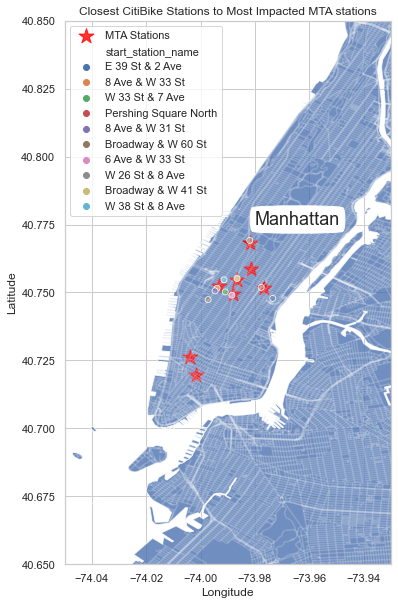

In [87]:
#Plot the shapefiles and coordinates of Bike Stations closest to most affected MTAs 

fig,ax=plt.subplots(figsize=(20,10))

#set bounds over area with CitiBike Stations
minx, miny, maxx, maxy = gdf.total_bounds
ax.set_xlim(-74.05, -73.93)
ax.set_ylim(40.65, 40.85)

#nyc borough boundary plot
gdf.plot(ax=ax,alpha=0.8,)

#nyc road shapefile plot
gdf_roads.plot(ax=ax,alpha=0.2,color="white")

#set annotation to Manhatten
plt.annotate(s="Manhattan",
             xy=(-73.98,40.775),
             fontsize=18,
             bbox=dict(boxstyle="round4",fc="white")
            )

#mta station plot
station_info_gdf_dec.plot(ax=ax,color="red",marker="*",markersize=250,label="MTA Stations",alpha=0.8)

'''#bike station plot
starting_bike_stations_2020_mta.plot(
        ax=ax,
        color="orange",
        alpha=.2,marker=".",
        label="2020 BikeStations to Target",
        markersize=25)
'''

sns.scatterplot(data=bike_2020_mta_top_ten,
                x="start_station_longitude",
                y="start_station_latitude",
                hue="start_station_name")

plt.legend(loc='upper left')
plt.title("Closest CitiBike Stations to Most Impacted MTA stations")
plt.xlabel('Longitude')
plt.ylabel("Latitude")

plt.savefig('close_citibike_to_top_mta.png',transparent=True,dpi=500)